In [1]:
path_to_files = "/fp/projects01/ec307/ec-krimhau/github_datasets"
file_name = "clean_github_repos_with_priority_issues.csv"
full_path = f'{path_to_files}/{file_name}'

In [2]:
import pandas as pd

# Save the combined DataFrame to a new CSV file
df = pd.read_csv(f'{path_to_files}/{file_name}')
df

,repo,labels,class,text
0,unitystation/unitystation,Bug High Priority In Progress UI,high,client breaking nre when using edit field on c...
1,paris-saclay-cds/ramp-board,bug frontend,non_priority,log for failed submissions no longer accessibl...
2,mikemaddem/BearCAD,no-issue-activity,non_priority,new documentation will happen once the project...
3,gatsbyjs/gatsby,type: question or discussion,non_priority,build and develop inconsistent styling please ...
4,zowe/sample-spring-boot-api-service,Feature: API Security Priority: High no-issue-...,high,the sdk provides a separate java nospring libr...
...,...,...,...,...
7704701,turnkeylinux/tracker,core feature security,non_priority,extend coverage to webmin webshell and other s...
7704702,gocd/gocd,dashboard wontfix,non_priority,dashboard api build cause material revision is...
7704703,istio/istio,area/policies and telemetry,non_priority,istio dashboard does not currently display con...
7704704,kubeflow/kubeflow,inference,non_priority,tfserving component should add an ambassador r...


In [3]:
rows_with_nan = df[df['class'].isna()]
rows_with_nan

,repo,labels,class,text


In [4]:
# Drop useless classes
df = df[~df['class'].str.contains("in_triage")]
df = df[~df['class'].str.contains("p2")]
df.reset_index(drop=True, inplace=True)
df

,repo,labels,class,text
0,unitystation/unitystation,Bug High Priority In Progress UI,high,client breaking nre when using edit field on c...
1,paris-saclay-cds/ramp-board,bug frontend,non_priority,log for failed submissions no longer accessibl...
2,mikemaddem/BearCAD,no-issue-activity,non_priority,new documentation will happen once the project...
3,gatsbyjs/gatsby,type: question or discussion,non_priority,build and develop inconsistent styling please ...
4,zowe/sample-spring-boot-api-service,Feature: API Security Priority: High no-issue-...,high,the sdk provides a separate java nospring libr...
...,...,...,...,...
7246734,turnkeylinux/tracker,core feature security,non_priority,extend coverage to webmin webshell and other s...
7246735,gocd/gocd,dashboard wontfix,non_priority,dashboard api build cause material revision is...
7246736,istio/istio,area/policies and telemetry,non_priority,istio dashboard does not currently display con...
7246737,kubeflow/kubeflow,inference,non_priority,tfserving component should add an ambassador r...


In [5]:
df['class'].value_counts()

class
non_priority    5907837
high             581664
low              322452
medium           260807
critical         173979
Name: count, dtype: int64

In [6]:
# Dropping duplicate issues. 
df = df.drop_duplicates(subset='text')
df

,repo,labels,class,text
0,unitystation/unitystation,Bug High Priority In Progress UI,high,client breaking nre when using edit field on c...
1,paris-saclay-cds/ramp-board,bug frontend,non_priority,log for failed submissions no longer accessibl...
2,mikemaddem/BearCAD,no-issue-activity,non_priority,new documentation will happen once the project...
3,gatsbyjs/gatsby,type: question or discussion,non_priority,build and develop inconsistent styling please ...
4,zowe/sample-spring-boot-api-service,Feature: API Security Priority: High no-issue-...,high,the sdk provides a separate java nospring libr...
...,...,...,...,...
7246731,kubernetes/kubernetes,area/kubeadm sig/cluster-lifecycle,non_priority,this might take a minute or longer hi people s...
7246732,SETI/pds-opus,Bug Effort-Easy Priority 3 Z-Debby,non_priority,in lists on main search page switch meaning ex...
7246734,turnkeylinux/tracker,core feature security,non_priority,extend coverage to webmin webshell and other s...
7246737,kubeflow/kubeflow,inference,non_priority,tfserving component should add an ambassador r...


In [7]:
df['class'].value_counts()

class
non_priority    4710976
high             444185
low              247394
medium           195751
critical         123778
Name: count, dtype: int64

In [8]:
# Bad repos with many bot issues 
bad_repos = ['AdguardTeam/AdguardFilters', 'webcompat/web-bugs', 'Predatoria/BeastsOfBermuda', 'Thy-Vipe/BeastsOfBermuda-issues' 'tomhughes/trac-tickets', 'k8smeetup/website-tasks', 'steedos/steedos-platform', 'msupply-foundation/mobile', 'StrangeLoopGames/EcoIssues']
# Test sets 
test_sets = ['flutter/flutter', 'rust-lang/rust', 'python/mypy']
remove_repos = bad_repos + test_sets
df = df[~df['repo'].isin(remove_repos)]
# Drop missing values from df
df.dropna(inplace=True)

# Reset the index of df
df.reset_index(drop=True, inplace=True)
df

/localscratch/491120/ipykernel_1989983/2873826402.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,repo,labels,class,text
0,unitystation/unitystation,Bug High Priority In Progress UI,high,client breaking nre when using edit field on c...
1,paris-saclay-cds/ramp-board,bug frontend,non_priority,log for failed submissions no longer accessibl...
2,mikemaddem/BearCAD,no-issue-activity,non_priority,new documentation will happen once the project...
3,gatsbyjs/gatsby,type: question or discussion,non_priority,build and develop inconsistent styling please ...
4,zowe/sample-spring-boot-api-service,Feature: API Security Priority: High no-issue-...,high,the sdk provides a separate java nospring libr...
...,...,...,...,...
5526846,kubernetes/kubernetes,area/kubeadm sig/cluster-lifecycle,non_priority,this might take a minute or longer hi people s...
5526847,SETI/pds-opus,Bug Effort-Easy Priority 3 Z-Debby,non_priority,in lists on main search page switch meaning ex...
5526848,turnkeylinux/tracker,core feature security,non_priority,extend coverage to webmin webshell and other s...
5526849,kubeflow/kubeflow,inference,non_priority,tfserving component should add an ambassador r...


In [9]:
# Check if any value in the 'repo' column is in the bad_repos list
contains_bad_repo = df['repo'].isin(bad_repos).any()
if contains_bad_repo == False:
    print(f"all repos removed. contains_bad_repo: {contains_bad_repo}")
else: 
    print("something went wrong when removing repos")
    contains_bad_repo

all repos removed. contains_bad_repo: False


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df['text'] = df['text'].astype(str)

# Calculate the length of each issue description
df['issue_length'] = df['text'].apply(len)

/localscratch/491120/ipykernel_1989983/1501419491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].astype(str)
/localscratch/491120/ipykernel_1989983/1501419491.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['issue_length'] = df['text'].apply(len)


In [11]:
# Calculate summary statistics for issue lengths
summary_stats = df['issue_length'].describe()

percentile_25th = int(summary_stats['25%'])
print(percentile_25th)
# Format and print the summary statistics for better readability
print("Issue Lengths Summary Statistics:")
print(f"Number of issues: {summary_stats['count']:.0f}")
print(f"Mean: {summary_stats['mean']:.2f} characters")
print(f"Standard Deviation: {summary_stats['std']:.2f} characters")
print(f"Minimum Length: {summary_stats['min']:.0f} characters")
print(f"25th Percentile: {summary_stats['25%']:.0f} characters")
print(f"Median (50th Percentile): {summary_stats['50%']:.0f} characters")
print(f"75th Percentile: {summary_stats['75%']:.0f} characters")
print(f"Maximum Length: {summary_stats['max']:.0f} characters")

199
Issue Lengths Summary Statistics:
Number of issues: 5526851
Mean: 819.36 characters
Standard Deviation: 2437.05 characters
Minimum Length: 1 characters
25th Percentile: 199 characters
Median (50th Percentile): 408 characters
75th Percentile: 811 characters
Maximum Length: 208080 characters


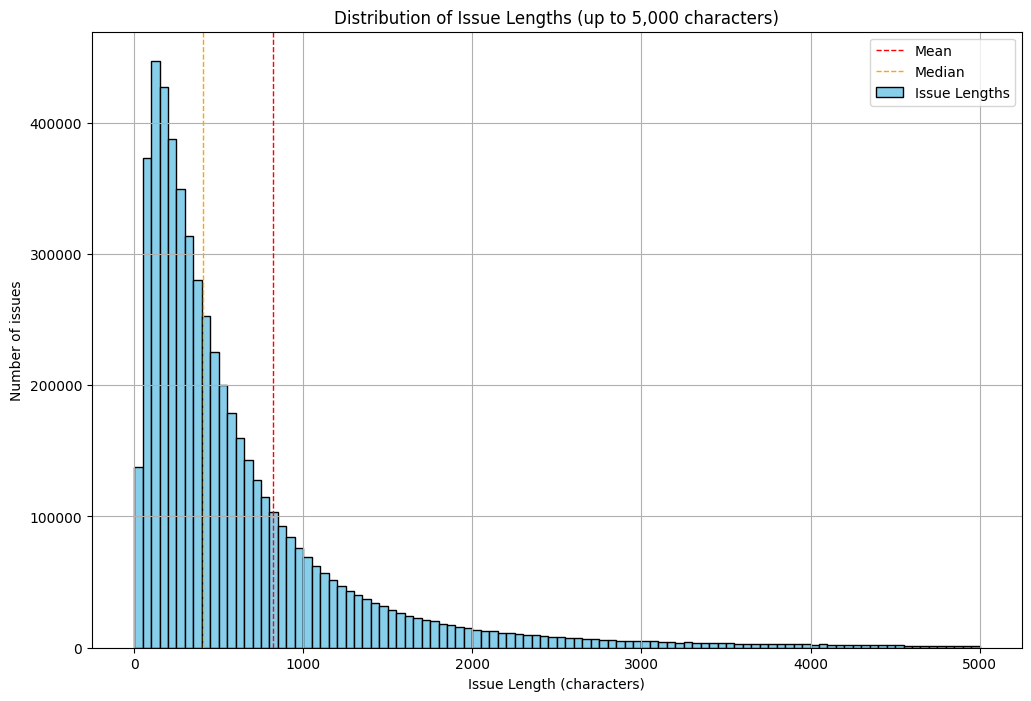

In [12]:
import matplotlib.pyplot as plt

# Plotting the distribution of issue lengths with updated parameters
plt.figure(figsize=(12, 8))
plt.hist(df['issue_length'], bins=100, color='skyblue', edgecolor='black', range=[0, 5000])
plt.title('Distribution of Issue Lengths (up to 5,000 characters)')
plt.xlabel('Issue Length (characters)')
plt.ylabel('Number of issues')
plt.axvline(df['issue_length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['issue_length'].median(), color='orange', linestyle='dashed', linewidth=1)
plt.legend(['Mean', 'Median', 'Issue Lengths'])
plt.grid(True)

# Show the plot
plt.show()


In [13]:
# Remove the 25th percentile (199) chars a small length issues
befor_len = len(df)
df = df[df['issue_length'] >= percentile_25th]
df.reset_index(drop=True, inplace=True)
after_len = len(df)
diff = befor_len - after_len
print(f"Before: {befor_len}. After: {after_len}. Issues removed: {diff}")
df

Before: 5526851. After: 4149912. Issues removed: 1376939


,repo,labels,class,text,issue_length
0,unitystation/unitystation,Bug High Priority In Progress UI,high,client breaking nre when using edit field on c...,766
1,paris-saclay-cds/ramp-board,bug frontend,non_priority,log for failed submissions no longer accessibl...,367
2,gatsbyjs/gatsby,type: question or discussion,non_priority,build and develop inconsistent styling please ...,1292
3,zowe/sample-spring-boot-api-service,Feature: API Security Priority: High no-issue-...,high,the sdk provides a separate java nospring libr...,516
4,react-navigation/react-navigation,Stale,non_priority,how to let the creatematerialtoptabnavigator c...,1558
...,...,...,...,...,...
4149907,broadinstitute/cromwell,Aborts AlphaCWL CWL,non_priority,cwl feature directory literals example docs di...,286
4149908,kubernetes/kubernetes,area/kubeadm sig/cluster-lifecycle,non_priority,this might take a minute or longer hi people s...,2180
4149909,SETI/pds-opus,Bug Effort-Easy Priority 3 Z-Debby,non_priority,in lists on main search page switch meaning ex...,200
4149910,turnkeylinux/tracker,core feature security,non_priority,extend coverage to webmin webshell and other s...,506


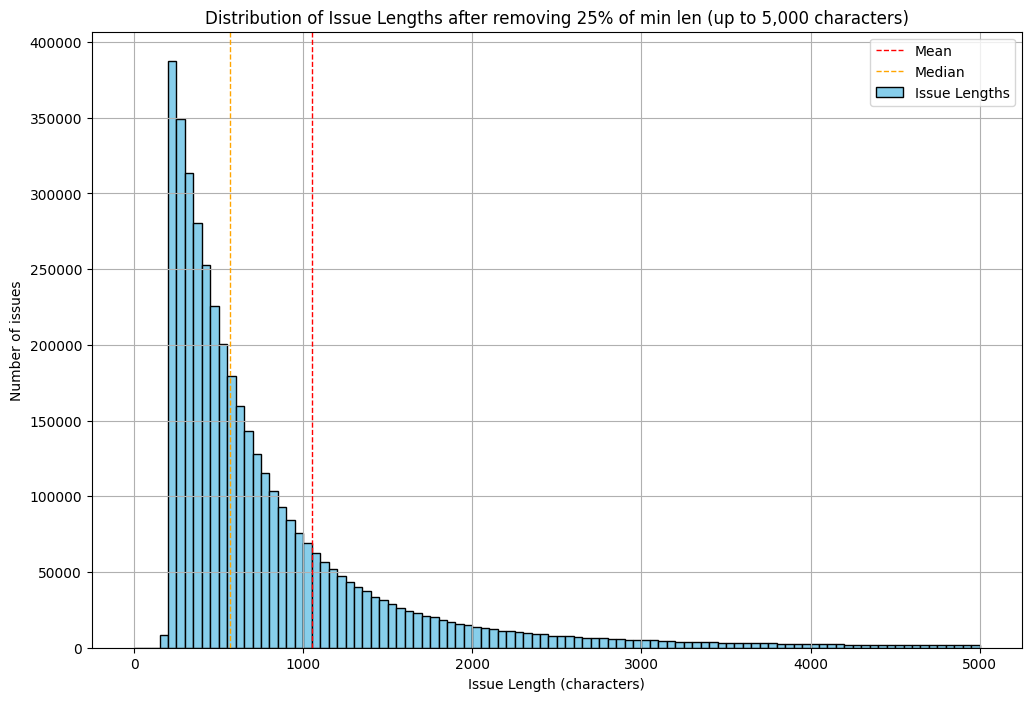

In [14]:
import matplotlib.pyplot as plt

# Plotting the distribution of issue lengths with updated parameters
plt.figure(figsize=(12, 8))
plt.hist(df['issue_length'], bins=100, color='skyblue', edgecolor='black', range=[0, 5000])
plt.title('Distribution of Issue Lengths after removing 25% of min len (up to 5,000 characters)')
plt.xlabel('Issue Length (characters)')
plt.ylabel('Number of issues')
plt.axvline(df['issue_length'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['issue_length'].median(), color='orange', linestyle='dashed', linewidth=1)
plt.legend(['Mean', 'Median', 'Issue Lengths'])
plt.grid(True)

# Show the plot
plt.show()

In [15]:
# Calculate summary statistics for issue lengths
summary_stats = df['issue_length'].describe()

percentile_25th = int(summary_stats['25%'])
print(percentile_25th)
# Format and print the summary statistics for better readability
print("Issue Lengths Summary Statistics:")
print(f"Number of issues: {summary_stats['count']:.0f}")
print(f"Mean: {summary_stats['mean']:.2f} characters")
print(f"Standard Deviation: {summary_stats['std']:.2f} characters")
print(f"Minimum Length: {summary_stats['min']:.0f} characters")
print(f"25th Percentile: {summary_stats['25%']:.0f} characters")
print(f"Median (50th Percentile): {summary_stats['50%']:.0f} characters")
print(f"75th Percentile: {summary_stats['75%']:.0f} characters")
print(f"Maximum Length: {summary_stats['max']:.0f} characters")

346
Issue Lengths Summary Statistics:
Number of issues: 4149912
Mean: 1052.28 characters
Standard Deviation: 2773.31 characters
Minimum Length: 199 characters
25th Percentile: 346 characters
Median (50th Percentile): 565 characters
75th Percentile: 1008 characters
Maximum Length: 208080 characters


In [16]:
# Count of issues per repo
repo_names = df['repo'].value_counts().to_frame()[:50].index.to_numpy()
print(repo_names)
df['repo'].value_counts().to_frame()[:50]

['microsoft/vscode' 'cockroachdb/cockroach'
 'department-of-veterans-affairs/va.gov-team' 'elastic/kibana'
 'Microsoft/vscode' 'kubernetes/kubernetes' 'dotnet/runtime'
 'godotengine/godot' 'Automattic/wp-calypso' 'brave/brave-browser'
 'elastic/elasticsearch' 'ansible/ansible' 'mozilla-mobile/fenix'
 'WordPress/gutenberg' 'dotnet/roslyn' 'dart-lang/sdk'
 'CleverRaven/Cataclysm-DDA' 'zephyrproject-rtos/zephyr' 'pytorch/pytorch'
 'pingcap/tidb' 'quarkusio/quarkus' 'magento/magento2' 'grafana/grafana'
 'ballerina-platform/ballerina-lang' 'appsmithorg/appsmith' 'eclipse/che'
 'dotnet/aspnetcore' 'sourcegraph/sourcegraph' 'qgis/QGIS'
 'vercel/next.js' 'dbeaver/dbeaver' 'Thy-Vipe/BeastsOfBermuda-issues'
 'mantidproject/mantid' 'facebook/react-native' 'istio/istio'
 'PrestaShop/PrestaShop' 'symfony/symfony' 'saltstack/salt'
 'Azure/azure-cli' 'gatsbyjs/gatsby' 'expo/expo'
 'lionheart/openradar-mirror' 'owncloud/core' 'xamarin/Xamarin.Forms'
 'Microsoft/TypeScript' 'dotnet/maui' 'microsoft/Typ

,count
repo,
microsoft/vscode,37463
cockroachdb/cockroach,36237
department-of-veterans-affairs/va.gov-team,32708
elastic/kibana,31763
Microsoft/vscode,22990
kubernetes/kubernetes,21298
dotnet/runtime,16979
godotengine/godot,16489
Automattic/wp-calypso,14988


In [17]:
# repos with most high priority labels.
high_priority_repos = df[df['class'] == 'high']['repo'].value_counts().to_frame()[:50]
high_priority_repos_only = df[df['class'] == 'high']['repo'].value_counts().nlargest(50).index.to_list()
print(high_priority_repos_only)

['kubernetes/kubernetes', 'eclipse/che', 'ray-project/ray', 'google/site-kit-wp', 'tomhughes/trac-tickets', 'GoogleCloudPlatform/python-docs-samples', 'ballerina-platform/ballerina-lang', 'pytorch/pytorch', 'aws/aws-cdk', 'o3de/o3de', 'googleapis/elixir-google-api', 'Automattic/wp-calypso', 'musescore/MuseScore', 'bazelbuild/bazel', 'jenkins-x/jx', 'wso2/product-is', 'dart-lang/sdk', 'mozilla-mobile/fenix', 'zulip/zulip', 'craftercms/craftercms', 'learningequality/kolibri', 'openshift/origin', '4GeeksAcademy/About-4Geeks-Academy', 'geosolutions-it/MapStore2', 'GoogleCloudPlatform/fda-mystudies', 'kubernetes/minikube', 'eclipse-ee4j/glassfish', 'mantidproject/mantid', 'javaee/glassfish', 'googleapis/google-cloud-go', 'dotnet/docs', 'ArctosDB/arctos', 'openmsupply/mobile', 'matrixorigin/matrixone', 'GoogleCloudPlatform/java-docs-samples', 'ita-social-projects/GreenCity', 'minishift/minishift', 'ampproject/amphtml', 'yugabyte/yugabyte-db', 'NOAA-PMEL/Ferret', 'dotnet/AspNetCore.Docs', 'op

In [18]:
df['class'].value_counts()

class
non_priority    3521347
high             273478
low              150964
medium           127399
critical          76724
Name: count, dtype: int64

In [19]:
# p2
df.loc[df["class"] == "p2", 'labels'].value_counts().to_frame().head(50)

,count
labels,


In [20]:
# Critical value count
# Maybe remove the blocker since it is not always about priority.
df.loc[df['class'] == 'critical', 'labels'].value_counts().to_frame().head(50)

,count
labels,
Severe Urgent,6471
bug critical,2914
critical,1289
C-test-failure O-robot O-roachtest branch-master release-blocker,1227
C-test-failure O-roachtest O-robot branch-master release-blocker,917
bug urgent,882
urgent,758
Critical,738
bug Critical,400


In [21]:
# Top labels for each priority level
df.loc[df['class'] == 'high', 'labels'].value_counts().to_frame().head(50)
# Print all labels for high priority
#pd.set_option('display.max_rows', None)
#df.loc[df['class'] == 'High', 'labels'].value_counts().to_frame()

,count
labels,
bug high priority,4669
P1,3689
high priority,3503
type: bug priority: p1 flakybot: issue,2521
autosynth failure priority: p1 type: bug,2319
High Priority,2060
enhancement high priority,2050
Priority: High,1623
P1 bug,1450


In [22]:
# Medium
df.loc[df['class'] == 'medium', 'labels'].value_counts().to_frame().head(50)

,count
labels,
auto-migrated Priority-Medium Type-Defect,3422
bug priority: medium,1327
Priority/Normal Type/Bug,1320
bug imported Priority-Medium,1189
Priority: Medium,1032
Type/Bug Priority/Normal,737
medium priority,706
bug medium priority,697
enhancement medium priority,678


In [23]:
# Low
df.loc[df['class'] == 'low', 'labels'].value_counts().to_frame().head(50)

,count
labels,
P3,1407
enhancement low priority,1316
low priority,1207
bug minor,948
bug low priority,861
minor,858
Priority: Low,713
bug priority: low,648
Low Priority,643


In [24]:
# non_priority
df.loc[df['class'] == 'non_priority', 'labels'].value_counts().to_frame().head(50)

,count
labels,
bug,335731
enhancement,146798
Bug,53575
question,46122
kind/bug,44137
stale,21272
feature,19966
type: bug,18527
Type: Bug,15365


In [25]:
# in_triage
df.loc[df['class'] == 'in_triage', 'labels'].value_counts().to_frame().head(50)

,count
labels,


In [26]:
# Unique repo
df['repo'].nunique()

46448

In [27]:
# Value count labels
df["labels"].value_counts().to_frame()[:50]

,count
labels,
bug,335731
enhancement,146798
Bug,53575
question,46122
kind/bug,44137
stale,21272
feature,19966
type: bug,18527
Type: Bug,15365


In [28]:
df.value_counts('class').to_frame()

,count
class,
non_priority,3521347
high,273478
low,150964
medium,127399
critical,76724


In [29]:
df

,repo,labels,class,text,issue_length
0,unitystation/unitystation,Bug High Priority In Progress UI,high,client breaking nre when using edit field on c...,766
1,paris-saclay-cds/ramp-board,bug frontend,non_priority,log for failed submissions no longer accessibl...,367
2,gatsbyjs/gatsby,type: question or discussion,non_priority,build and develop inconsistent styling please ...,1292
3,zowe/sample-spring-boot-api-service,Feature: API Security Priority: High no-issue-...,high,the sdk provides a separate java nospring libr...,516
4,react-navigation/react-navigation,Stale,non_priority,how to let the creatematerialtoptabnavigator c...,1558
...,...,...,...,...,...
4149907,broadinstitute/cromwell,Aborts AlphaCWL CWL,non_priority,cwl feature directory literals example docs di...,286
4149908,kubernetes/kubernetes,area/kubeadm sig/cluster-lifecycle,non_priority,this might take a minute or longer hi people s...,2180
4149909,SETI/pds-opus,Bug Effort-Easy Priority 3 Z-Debby,non_priority,in lists on main search page switch meaning ex...,200
4149910,turnkeylinux/tracker,core feature security,non_priority,extend coverage to webmin webshell and other s...,506


In [30]:
high = df[df['class'] == 'high']
high

,repo,labels,class,text,issue_length
0,unitystation/unitystation,Bug High Priority In Progress UI,high,client breaking nre when using edit field on c...,766
3,zowe/sample-spring-boot-api-service,Feature: API Security Priority: High no-issue-...,high,the sdk provides a separate java nospring libr...,516
7,openmsupply/mobile,Docs: not needed Effort: small Feature Module:...,high,autolog out after some time frame is your feat...,1016
24,wordpress-mobile/WordPress-Android,IA Reader [Pri] High [Type] Task,high,ia reader filter bottom sheet manage untitled ...,347
85,tajmone/pmotion-assets,:books: documentation :electric_plug: file I/O...,high,images with alpha layer exported twice current...,635
...,...,...,...,...,...
4149815,Earthii/Simple-Camera-SOEN-390,high priority high risk in progress user story,high,as a user i should be able to take pictures du...,345
4149837,washingtonstateuniversity/WSU-Web-Crawler,enhancement priority:high,high,separate initial url collection from url data ...,1297
4149858,asteca/ASteCA,code_enhance p:high performance synth-cl,high,improve performance of synth cluster generatio...,2311
4149879,xcat2/xcat-core,priority:high sprint1 status:pending type:bug,high,error message improvement when adding users in...,1369


In [31]:
critical = df[df['class'] == 'critical']
critical 

,repo,labels,class,text,issue_length
102,ConsumerDataStandardsAustralia/standards-maint...,change request security urgent,critical,removal of requirement for cdr ca certificate ...,1262
163,OmarAlghamdi/walkly-android,critical enhancement,critical,starting a new offline battle does not reduce ...,243
236,mhunter1/dynr,blocker critical,critical,use safe type check to fix cran failure as mai...,1466
327,pingcap/tidb-operator,area/controller priority/critical-urgent type/bug,critical,tidbcontrollermanager failed to start due to f...,831
385,ballerinax/docker,Points/4 Priority/Highest Severity/Critical,critical,update docker base image description the base ...,245
...,...,...,...,...,...
4149399,nova-video-player/aos-AVP,bug blocker,critical,sqliteconstraintexception during scrape from o...,1660
4149488,viperproject/silicon,bug blocker,critical,regression crash with unit snapshot cannot be ...,5154
4149503,dvorka/mindforger,bug :lady_beetle: :finnadie: blocker :green_ap...,critical,macos big sur qt x images with white spaces in...,616
4149597,Sasha-hk/Appointment-website,bug documentation enhancement invalid wontfix ...,critical,master schedule without timezone task descript...,338


In [32]:
p2_high = df[df['class'] == 'p2_high']
p2_high

,repo,labels,class,text,issue_length


In [33]:
low = df[df['class'] == 'low']
low

,repo,labels,class,text,issue_length
9,BBj-Plugins/BBjGridExWidget,Area: Documentations Change: Minor Type: Enha...,low,extend the public plugin description describe ...,340
77,MarkBind/markbind,c.Enhancement f-CodeBlocks p.Low,low,indicate the language of a code block tell us ...,306
200,zeit/next.js,Type: Bug priority: low,low,runtimeconfigs not picked up bug report the fo...,938
255,NREL/EnergyPlus,Defect PriorityLow SeverityHigh,low,mscomctlocx missing from installer hi there it...,390
282,appirio-tech/connect-app,BH_OOS BugHunt_JanRelease P3 UI,low,headings should be aligned in one line expecte...,460
...,...,...,...,...,...
4149687,bounswe/bounswe2022group5,Low Priority Status: In Progress,low,filling the liked repositories page with the f...,525
4149730,nuxt/framework,bug nuxt3 components 🔨 p3-minor-bug,low,maximum call stack size exceeded for button co...,4207
4149742,vector-im/element-web,T-Defect S-Minor X-Needs-Design O-Frequent A-T...,low,thread list lacks a loading state steps to rep...,523
4149747,CafeteriaGuild/DeepMobLearning-Refabricated,enhancement Low Priority,low,thunderstrike during trials destroying the loo...,246


In [34]:
medium = df[df['class'] == 'medium']
medium

,repo,labels,class,text,issue_length
145,openmsupply/mobile,Docs: not needed Effort: small Feature Module:...,medium,add cash register page toggle is your feature ...,378
147,openmsupply/mobile,Effort: medium Feature Module: indicators Prio...,medium,enforce indicator types is your feature reques...,346
227,BLUDRAG/SOFlow,enhancement medium priority,medium,create new option for dropdown scriptable obje...,291
256,wso2/product-apim,3.1.0 Priority/Normal Type/New Feature,medium,add option to determine deploymenttoml replace...,1517
261,ericauv/ericauv-portfolio,Medium Priority,medium,header takes too much vertical space on wide s...,229
...,...,...,...,...,...
4149461,projectdiscovery/subfinder,Priority: Medium Status: Completed Type: Bug,medium,no results using dl if lines ends in a tab des...,442
4149472,Blade2021/HIVE,Type: bug Priority: medium Status: approved,medium,led power calculation commands not working des...,284
4149474,ZcashFoundation/zebra,A-infrastructure A-devops P-Medium :zap: I-con...,medium,run full sync tests on mainnet motivation we w...,1030
4149583,MarketSquare/robotframework-browser,enhancement priority: medium,medium,should be able to highlight for get text keywo...,446


In [35]:
non_priority = df[df['class'] == 'non_priority']
non_priority

,repo,labels,class,text,issue_length
1,paris-saclay-cds/ramp-board,bug frontend,non_priority,log for failed submissions no longer accessibl...,367
2,gatsbyjs/gatsby,type: question or discussion,non_priority,build and develop inconsistent styling please ...,1292
4,react-navigation/react-navigation,Stale,non_priority,how to let the creatematerialtoptabnavigator c...,1558
5,rust-lang/cargo,C-feature-request,non_priority,provide targetcpu and targetfeatures to builds...,334
6,Monika-After-Story/MonikaModDev,suggestion,non_priority,crossed armsarms under table poses when idle c...,281
...,...,...,...,...,...
4149907,broadinstitute/cromwell,Aborts AlphaCWL CWL,non_priority,cwl feature directory literals example docs di...,286
4149908,kubernetes/kubernetes,area/kubeadm sig/cluster-lifecycle,non_priority,this might take a minute or longer hi people s...,2180
4149909,SETI/pds-opus,Bug Effort-Easy Priority 3 Z-Debby,non_priority,in lists on main search page switch meaning ex...,200
4149910,turnkeylinux/tracker,core feature security,non_priority,extend coverage to webmin webshell and other s...,506


In [36]:
high_priority = pd.concat([critical, high, p2_high], ignore_index=True)
high_priority["label"] = 1
high_priority

,repo,labels,class,text,issue_length,label
0,ConsumerDataStandardsAustralia/standards-maint...,change request security urgent,critical,removal of requirement for cdr ca certificate ...,1262,1
1,OmarAlghamdi/walkly-android,critical enhancement,critical,starting a new offline battle does not reduce ...,243,1
2,mhunter1/dynr,blocker critical,critical,use safe type check to fix cran failure as mai...,1466,1
3,pingcap/tidb-operator,area/controller priority/critical-urgent type/bug,critical,tidbcontrollermanager failed to start due to f...,831,1
4,ballerinax/docker,Points/4 Priority/Highest Severity/Critical,critical,update docker base image description the base ...,245,1
...,...,...,...,...,...,...
350197,Earthii/Simple-Camera-SOEN-390,high priority high risk in progress user story,high,as a user i should be able to take pictures du...,345,1
350198,washingtonstateuniversity/WSU-Web-Crawler,enhancement priority:high,high,separate initial url collection from url data ...,1297,1
350199,asteca/ASteCA,code_enhance p:high performance synth-cl,high,improve performance of synth cluster generatio...,2311,1
350200,xcat2/xcat-core,priority:high sprint1 status:pending type:bug,high,error message improvement when adding users in...,1369,1


In [37]:
rest = pd.concat([non_priority, low, medium], ignore_index=True)
rest["label"] = 0
rest

,repo,labels,class,text,issue_length,label
0,paris-saclay-cds/ramp-board,bug frontend,non_priority,log for failed submissions no longer accessibl...,367,0
1,gatsbyjs/gatsby,type: question or discussion,non_priority,build and develop inconsistent styling please ...,1292,0
2,react-navigation/react-navigation,Stale,non_priority,how to let the creatematerialtoptabnavigator c...,1558,0
3,rust-lang/cargo,C-feature-request,non_priority,provide targetcpu and targetfeatures to builds...,334,0
4,Monika-After-Story/MonikaModDev,suggestion,non_priority,crossed armsarms under table poses when idle c...,281,0
...,...,...,...,...,...,...
3799705,projectdiscovery/subfinder,Priority: Medium Status: Completed Type: Bug,medium,no results using dl if lines ends in a tab des...,442,0
3799706,Blade2021/HIVE,Type: bug Priority: medium Status: approved,medium,led power calculation commands not working des...,284,0
3799707,ZcashFoundation/zebra,A-infrastructure A-devops P-Medium :zap: I-con...,medium,run full sync tests on mainnet motivation we w...,1030,0
3799708,MarketSquare/robotframework-browser,enhancement priority: medium,medium,should be able to highlight for get text keywo...,446,0


In [38]:
from sklearn.utils import shuffle
# Number of rows in the highest class
n_high = high_priority.shape[0]

rest_sampled = rest.sample(n=n_high, random_state=42)  


balanced_data = pd.concat([high_priority, rest_sampled])

# Shuffle the combined dataset
balanced_data = shuffle(balanced_data, random_state=42)
balanced_data



,repo,labels,class,text,issue_length,label
285742,zulip/zulip,area: production good first issue help wanted ...,high,clean up output from cleanunusedcaches as show...,442,1
224681,kir-dev/pek-next,bug good-first-issue priority: high,high,clean final evaluation a magyar leírás lent ta...,264,1
418758,grafana/grafana,comp: alerting type: feature request,non_priority,alerting state history information alerting fe...,241,0
114664,3scale/aws-nlb-helper-operator,kind/bug kind/enhancement priority/important-s...,high,makefile referencing wrong file path the make ...,233,1
244831,ray-project/ray,P1 rllib flaky-tracker,high,linuxrllib is failingflaky on master failed fa...,278,1
...,...,...,...,...,...,...
259178,webpack-contrib/source-map-loader,priority: 4 (important) severity: 3 (broken) s...,high,namespacing if several vendors source map use ...,607,1
3435147,mozilla/webmaker-android,bug feedback,non_priority,changing element properties often causes all o...,230,0
131932,MLH-Fellowship/babel-sandbox,High Priority Server,high,configure server for production the server mus...,209,1
3601204,apache/hudi,priority:minor feature-enquiry spark-sql,low,hoodiesparksqlwriter use sparkcontexthadoopcon...,757,0


In [39]:

balanced_data['class'].value_counts()

class
non_priority    324796
high            273478
critical         76724
low              13750
medium           11656
Name: count, dtype: int64

In [40]:
balanced_data['labels'].value_counts().to_frame()[:50]

,count
labels,
bug,31018
enhancement,13529
Severe Urgent,6471
Bug,4977
bug high priority,4669
question,4213
kind/bug,4002
P1,3689
high priority,3503


In [41]:
balanced_data = balanced_data[["label", "text"]]
balanced_data

,label,text
285742,1,clean up output from cleanunusedcaches as show...
224681,1,clean final evaluation a magyar leírás lent ta...
418758,0,alerting state history information alerting fe...
114664,1,makefile referencing wrong file path the make ...
244831,1,linuxrllib is failingflaky on master failed fa...
...,...,...
259178,1,namespacing if several vendors source map use ...
3435147,0,changing element properties often causes all o...
131932,1,configure server for production the server mus...
3601204,0,hoodiesparksqlwriter use sparkcontexthadoopcon...


In [42]:
balanced_data['label'].value_counts()

label
1    350202
0    350202
Name: count, dtype: int64

In [43]:
df.isnull().any().any()


False

In [44]:
file_name = f'{path_to_files}/HP_vs_rest/high_vs_rest_min_len_25th_percentile.csv'

In [45]:
balanced_data.to_csv(file_name, index=False)

In [46]:
testing = pd.read_csv(file_name)

In [47]:
testing

,label,text
0,1,clean up output from cleanunusedcaches as show...
1,1,clean final evaluation a magyar leírás lent ta...
2,0,alerting state history information alerting fe...
3,1,makefile referencing wrong file path the make ...
4,1,linuxrllib is failingflaky on master failed fa...
...,...,...
700399,1,namespacing if several vendors source map use ...
700400,0,changing element properties often causes all o...
700401,1,configure server for production the server mus...
700402,0,hoodiesparksqlwriter use sparkcontexthadoopcon...
